In [124]:
import numpy as np
from gwpy.timeseries import  TimeSeries
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])

red = (0.80, 0.36, 0.36)
green = (0.62, 0.79, 0.62)
blue = (0.27, 0.51, 0.71)

plt.rcParams['axes.labelsize'] = 11.
plt.rc('xtick',labelsize=11)
plt.rc('ytick',labelsize=11)

In [125]:

def plot_q_transform(data, srate = 4096., whiten = None, minimum_frequency = None, trigger_time = None, ax = None, tres = 0.01, fres=0.01, **kwargs):
    """
    Plot the q tranform of a time series (it relies on gwpy for the q transform)

    Parameters
    ----------
        data: gwpy TimeSeries
            Input data to plot
        srate: sampling rate
        whiten:
        minimum_frequency: Float Hz
    """
    #data = data.resample(srate)

    # Q-transform with Gravity Spy standards
    if 'qrange' in kwargs.keys():
        qrange = kwargs['qrange']
    else:
        qrange=[4, 64]

    if 'maximum_frequency' in kwargs.keys():
        maximum_frequency = kwargs['maximum_frequency']
    else:
        maximum_frequency = 1290

    if 'vmin' in kwargs.keys():
        vmin = kwargs['vmin']
        vmax = kwargs['vmax']
    else:
        vmin = 0
        vmax = 20

    q_scan = data.q_transform(qrange=qrange, 
                                frange=[minimum_frequency, maximum_frequency],
                                tres=tres,
                                fres=fres,
                                whiten=whiten)


    # We plot according to Gravity Spy standards
    if ax is None:
        fig, handle_ax  = plt.subplots(figsize = (12, 4), dpi=150)
    else:
        handle_ax = ax
        fig = None
    q_scan.xindex = q_scan.xindex.to_value() - trigger_time
    imshow = handle_ax.imshow(q_scan, vmin = vmin, vmax = vmax)

    handle_ax.set_yscale('log', base=2)
    handle_ax.set_xscale('linear')
    handle_ax.tick_params(axis ='both', which ='major')
    return fig, handle_ax, imshow

In [126]:
_data = 'L-L1_GWOSC_4KHZ_R1-1187008867-32.gwf'

In [127]:
data = TimeSeries.read(_data, channel = 'L1:GWOSC-4KHZ_R1_STRAIN')
trigger_time = 1187008882.4 
start = trigger_time - 7.5
end = trigger_time +0.5

In [128]:
crop_data = data.crop(start = start, end = end)

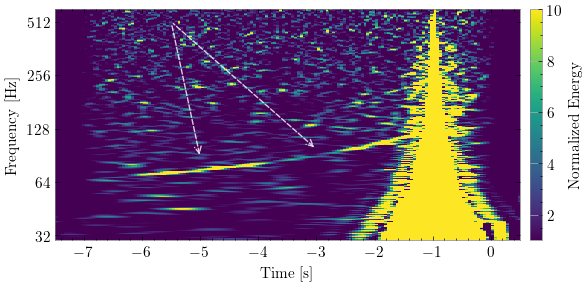

In [166]:
plt.rcParams['axes.labelsize'] = 11.
plt.rc('xtick',labelsize=11)
plt.rc('ytick',labelsize=11)
fig, ax = plt.subplots(1, 1, figsize = (6, 3))
tres = 0.05
fres = 0.008
maximum_frequency = 900
vmin = 2
vmax = 12
_, ax, _ = plot_q_transform(crop_data, minimum_frequency=30, trigger_time=trigger_time, whiten = True, ax = ax, tres = tres, fres = fres, maximum_frequency = maximum_frequency, 
                              qrange = (110, 120))

ax.colorbar(vmin = 1, vmax = 10, label = 'Normalized Energy')
ax.annotate(text = '', xy = (-5.5, 512), xytext = (-5, 88), arrowprops  = dict(arrowstyle = '<-' , color = 'white', alpha = 0.8, ls = '--'))
ax.annotate(text = '', xy = (-5.5, 512), xytext = (-3, 98), arrowprops  = dict(arrowstyle = '<-' , color = 'white', alpha = 0.8, ls = '--'))

ax.set_ylim(30, 600)
eyeball_x = np.array([-6, -4, -2])
eyeball_y = np.array([70, 81, 107])
ax.grid()
#ax.scatter(eyeball_x, eyeball_y, color = 'white', marker = 'x', s = 20, lw = 1.)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Frequency [Hz]')
fig.savefig('gw170817scan.pdf')
fig.savefig('../../figures/gw170817scan.pdf')
